# Lesson 3: Image = Matrix
## Biomedical Image Processing - Basic Concepts

### Topics:
- Understanding images as numerical matrices
- Direct pixel manipulation
- Creating images from scratch
- Surprising mathematical operations on images

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

print("Libraries imported successfully!")

Libraries imported successfully!


## 1. The Big Revelation: Images ARE Numbers!

When you look at a photo, you see colors, shapes, and meaning.
When a computer looks at the same photo, it sees... **NUMBERS!**

Let's prove it!

In [2]:
# Create a tiny 5x5 grayscale image
tiny_image = np.array([
    [0,   0,   255, 0,   0  ],
    [0,   255, 255, 255, 0  ],
    [255, 255, 255, 255, 255],
    [0,   255, 255, 255, 0  ],
    [0,   0,   255, 0,   0  ]
], dtype=np.uint8)

print("This is what the computer sees:")
print(tiny_image)
print(f"\nShape: {tiny_image.shape}")
print(f"Data type: {tiny_image.dtype}")

This is what the computer sees:
[[  0   0 255   0   0]
 [  0 255 255 255   0]
 [255 255 255 255 255]
 [  0 255 255 255   0]
 [  0   0 255   0   0]]

Shape: (5, 5)
Data type: uint8


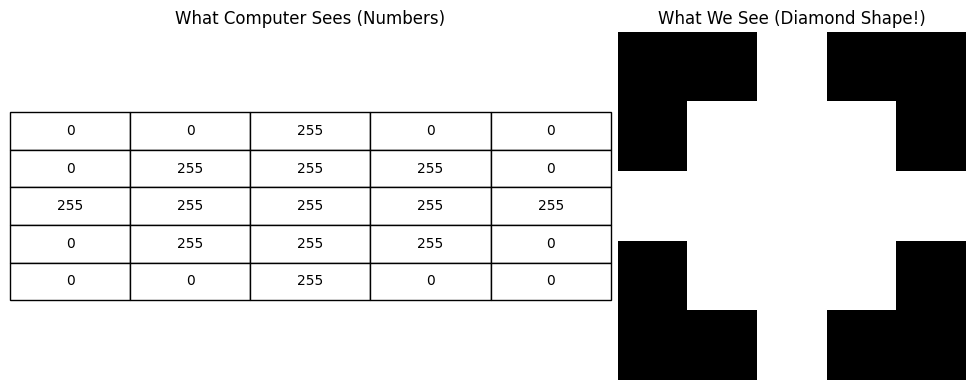

The same data - two different perspectives!


In [ ]:
# Now let's see what it looks like as an image
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Show as table
axes[0].axis('off')
axes[0].set_title('What Computer Sees (Numbers)', fontsize=12)
table = axes[0].table(cellText=tiny_image, loc='center', cellLoc='center')
table.scale(1.5, 2)

# Show as image
axes[1].imshow(tiny_image, cmap='gray', vmin=0, vmax=255)
axes[1].set_title('What We See', fontsize=12)
axes[1].axis('off')

plt.tight_layout()
plt.show()

print("The same data - two different perspectives!")

## 2. Creating Art with Numbers

Since images are just matrices, we can create ANY image by typing numbers!

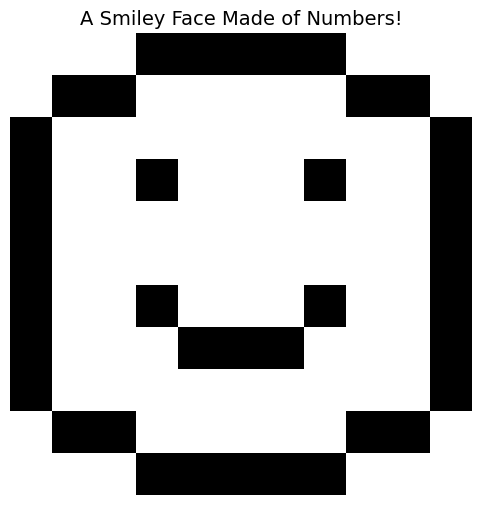

The matrix:
[[255 255 255   0   0   0   0   0 255 255 255]
 [255   0   0 255 255 255 255 255   0   0 255]
 [  0 255 255 255 255 255 255 255 255 255   0]
 [  0 255 255   0 255 255 255   0 255 255   0]
 [  0 255 255 255 255 255 255 255 255 255   0]
 [  0 255 255 255 255 255 255 255 255 255   0]
 [  0 255 255   0 255 255 255   0 255 255   0]
 [  0 255 255 255   0   0   0 255 255 255   0]
 [  0 255 255 255 255 255 255 255 255 255   0]
 [255   0   0 255 255 255 255 255   0   0 255]
 [255 255 255   0   0   0   0   0 255 255 255]]


In [4]:
# Create a smiley face using numbers!
smiley = np.ones((11, 11), dtype=np.uint8) * 255  # White background

# Draw face outline (circle approximation)
smiley[0, 3:8] = 0
smiley[1, 1:3] = 0
smiley[1, 8:10] = 0
smiley[2, 0] = 0
smiley[2, 10] = 0
smiley[3:8, 0] = 0
smiley[3:8, 10] = 0
smiley[8, 0] = 0
smiley[8, 10] = 0
smiley[9, 1:3] = 0
smiley[9, 8:10] = 0
smiley[10, 3:8] = 0

# Draw eyes
smiley[3, 3] = 0
smiley[3, 7] = 0

# Draw smile
smiley[6, 3] = 0
smiley[6, 7] = 0
smiley[7, 4:7] = 0

plt.figure(figsize=(6, 6))
plt.imshow(smiley, cmap='gray', vmin=0, vmax=255, interpolation='nearest')
plt.title('A Smiley Face Made of Numbers!', fontsize=14)
plt.axis('off')
plt.show()

print("The matrix:")
print(smiley)

## 3. Hidden Messages in Images!

Since images are numbers, we can hide secret messages by slightly changing pixel values.
This technique is called **Steganography**.

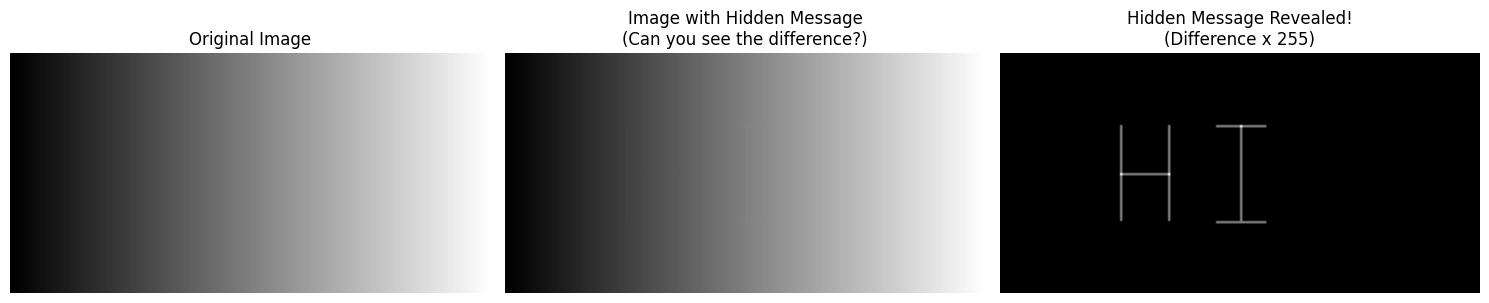

Maximum pixel difference: 2
The human eye cannot detect a difference of just 1 intensity level!


In [5]:
# Create a gradient image
gradient = np.zeros((100, 200), dtype=np.uint8)
for i in range(200):
    gradient[:, i] = int(i * 255 / 199)

# Hide a message by making tiny changes
secret_image = gradient.copy()

# Let's hide "HI" in the image
# H pattern
secret_image[30:70, 50] += 1
secret_image[30:70, 70] += 1
secret_image[50, 50:71] += 1

# I pattern
secret_image[30, 90:111] += 1
secret_image[30:70, 100] += 1
secret_image[70, 90:111] += 1

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

axes[0].imshow(gradient, cmap='gray')
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(secret_image, cmap='gray')
axes[1].set_title('Image with Hidden Message\n(Can you see the difference?)')
axes[1].axis('off')

# Reveal the hidden message
difference = (secret_image.astype(np.int16) - gradient.astype(np.int16)) * 255
axes[2].imshow(difference, cmap='gray')
axes[2].set_title('Hidden Message Revealed!\n(Difference x 255)')
axes[2].axis('off')

plt.tight_layout()
plt.show()

print(f"Maximum pixel difference: {np.max(np.abs(secret_image.astype(int) - gradient.astype(int)))}")
print("The human eye cannot detect a difference of just 1 intensity level!")

## 4. Mathematical Operations = Image Effects!

Every image filter is just math. Let's see some examples.

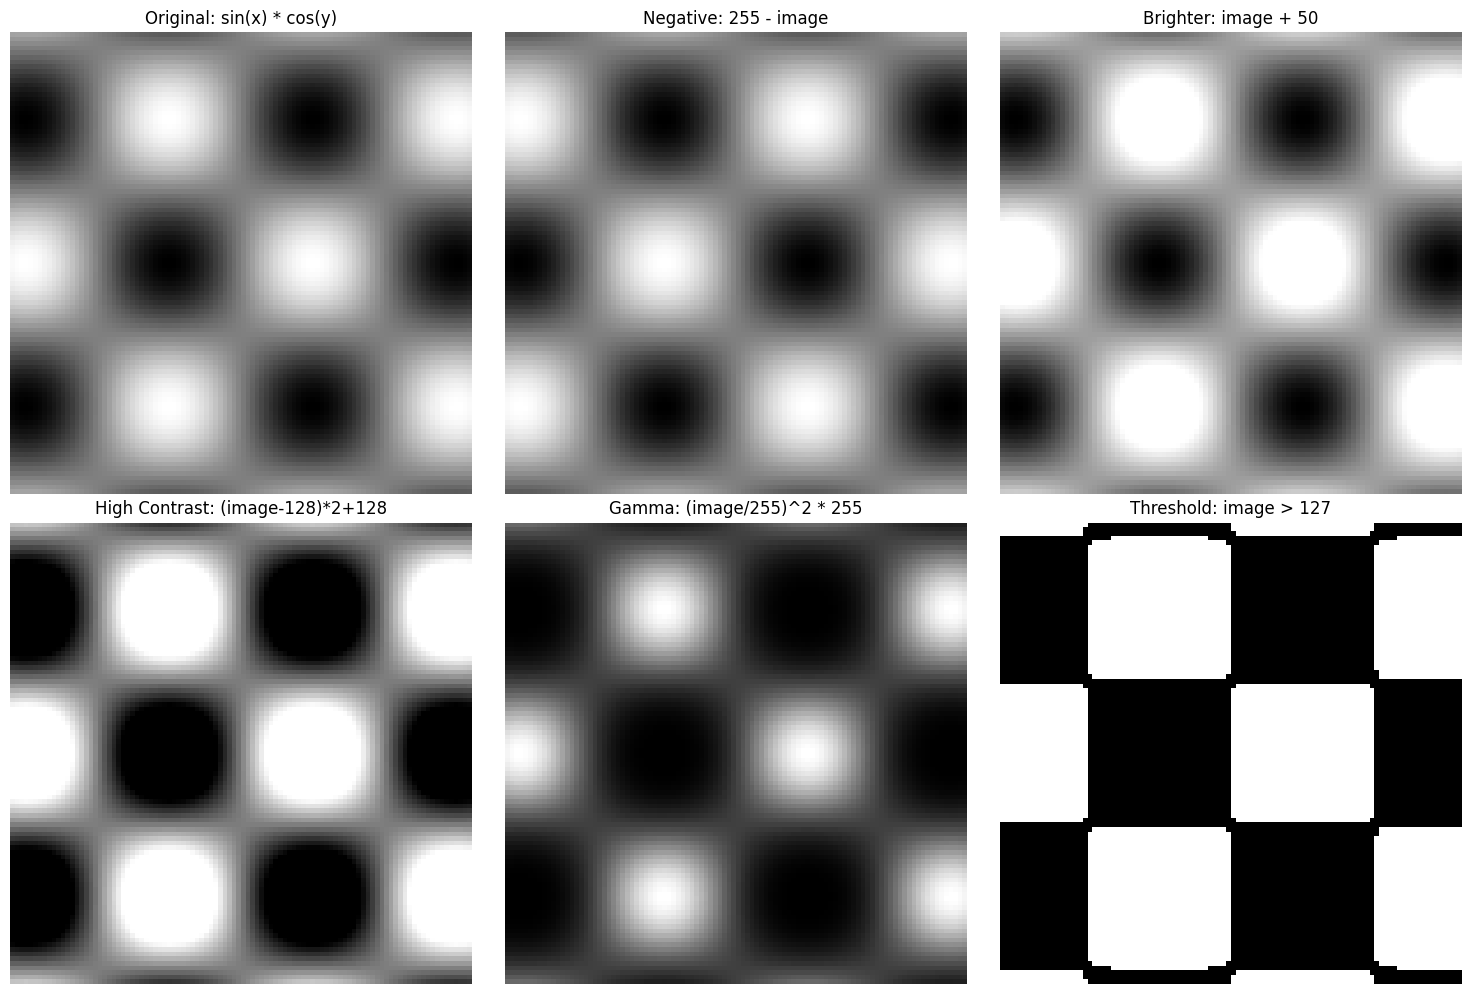

In [6]:
# Create a simple test image
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)

# Create a pattern using math
original = np.sin(X) * np.cos(Y)
original = ((original + 1) * 127).astype(np.uint8)  # Normalize to 0-255

fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Original
axes[0, 0].imshow(original, cmap='gray')
axes[0, 0].set_title('Original: sin(x) * cos(y)')
axes[0, 0].axis('off')

# Negative (invert)
negative = 255 - original
axes[0, 1].imshow(negative, cmap='gray')
axes[0, 1].set_title('Negative: 255 - image')
axes[0, 1].axis('off')

# Brighten
brighter = np.clip(original.astype(np.int16) + 50, 0, 255).astype(np.uint8)
axes[0, 2].imshow(brighter, cmap='gray')
axes[0, 2].set_title('Brighter: image + 50')
axes[0, 2].axis('off')

# Contrast
high_contrast = np.clip((original.astype(np.float32) - 128) * 2 + 128, 0, 255).astype(np.uint8)
axes[1, 0].imshow(high_contrast, cmap='gray')
axes[1, 0].set_title('High Contrast: (image-128)*2+128')
axes[1, 0].axis('off')

# Square
squared = ((original.astype(np.float32) / 255) ** 2 * 255).astype(np.uint8)
axes[1, 1].imshow(squared, cmap='gray')
axes[1, 1].set_title('Gamma: (image/255)^2 * 255')
axes[1, 1].axis('off')

# Threshold
threshold = (original > 127).astype(np.uint8) * 255
axes[1, 2].imshow(threshold, cmap='gray')
axes[1, 2].set_title('Threshold: image > 127')
axes[1, 2].axis('off')

plt.tight_layout()
plt.show()

## 5. Color Images: 3D Matrices!

A color image is actually 3 matrices stacked together:
- **Red channel** (R)
- **Green channel** (G)  
- **Blue channel** (B)

Grayscale shape: (100, 100)
Color image shape: (100, 100, 3)
The third dimension (3) = [R, G, B] channels


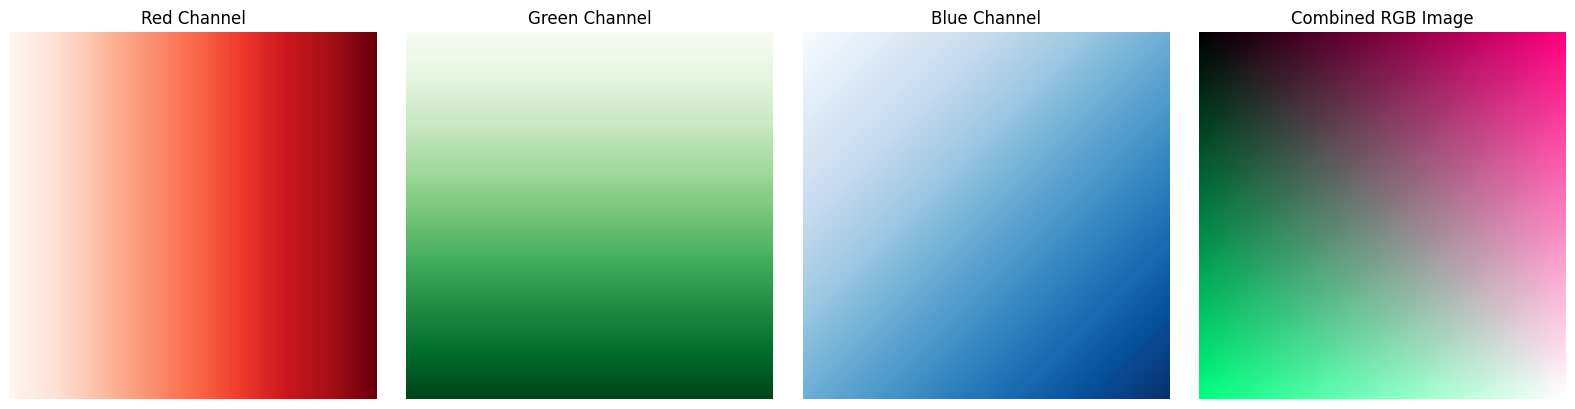

In [7]:
# Create a color image from 3 matrices
height, width = 100, 100

# Red channel - horizontal gradient
red = np.zeros((height, width), dtype=np.uint8)
for i in range(width):
    red[:, i] = int(i * 255 / (width - 1))

# Green channel - vertical gradient
green = np.zeros((height, width), dtype=np.uint8)
for i in range(height):
    green[i, :] = int(i * 255 / (height - 1))

# Blue channel - diagonal gradient
blue = np.zeros((height, width), dtype=np.uint8)
for i in range(height):
    for j in range(width):
        blue[i, j] = int((i + j) * 255 / (height + width - 2))

# Stack to create RGB image
color_image = np.stack([red, green, blue], axis=2)

print(f"Grayscale shape: {red.shape}")
print(f"Color image shape: {color_image.shape}")
print(f"The third dimension (3) = [R, G, B] channels")

fig, axes = plt.subplots(1, 4, figsize=(16, 4))

axes[0].imshow(red, cmap='Reds')
axes[0].set_title('Red Channel')
axes[0].axis('off')

axes[1].imshow(green, cmap='Greens')
axes[1].set_title('Green Channel')
axes[1].axis('off')

axes[2].imshow(blue, cmap='Blues')
axes[2].set_title('Blue Channel')
axes[2].axis('off')

axes[3].imshow(color_image)
axes[3].set_title('Combined RGB Image')
axes[3].axis('off')

plt.tight_layout()
plt.show()

## 6. Mind-Bending: Images Can Be Added!

Since images are matrices, we can do matrix operations on them!

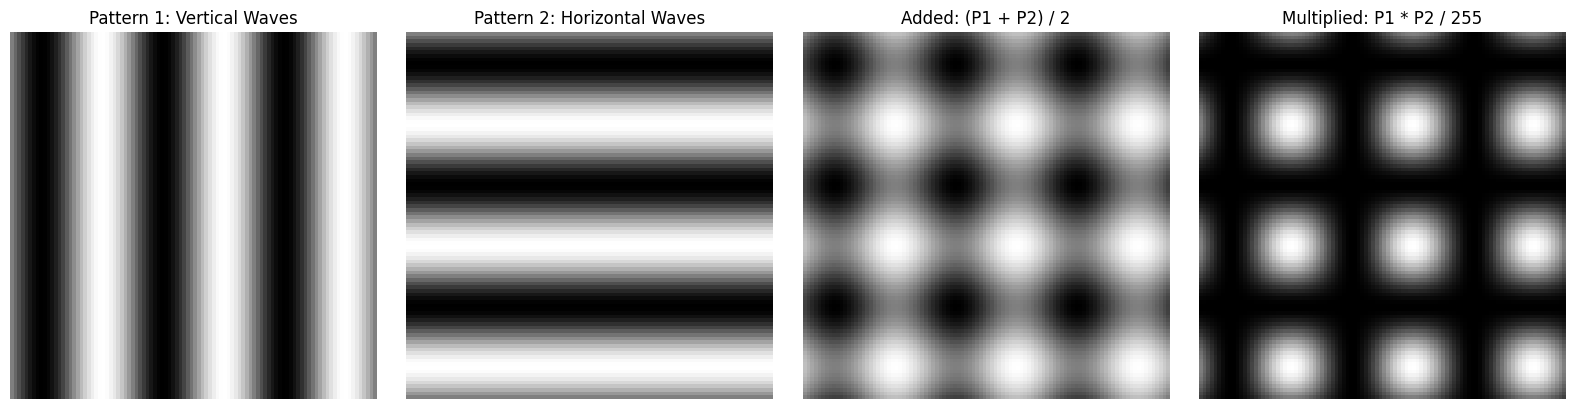

When we multiply: Dark (0) x Anything = Dark (0)
This creates a checkerboard-like pattern!


In [8]:
# Create two different patterns
size = 100
x = np.linspace(-np.pi, np.pi, size)
y = np.linspace(-np.pi, np.pi, size)
X, Y = np.meshgrid(x, y)

# Pattern 1: Vertical waves
pattern1 = ((np.sin(X * 3) + 1) * 127).astype(np.uint8)

# Pattern 2: Horizontal waves
pattern2 = ((np.sin(Y * 3) + 1) * 127).astype(np.uint8)

# Add them together (with normalization)
added = ((pattern1.astype(np.float32) + pattern2.astype(np.float32)) / 2).astype(np.uint8)

# Multiply them
multiplied = (pattern1.astype(np.float32) * pattern2.astype(np.float32) / 255).astype(np.uint8)

fig, axes = plt.subplots(1, 4, figsize=(16, 4))

axes[0].imshow(pattern1, cmap='gray')
axes[0].set_title('Pattern 1: Vertical Waves')
axes[0].axis('off')

axes[1].imshow(pattern2, cmap='gray')
axes[1].set_title('Pattern 2: Horizontal Waves')
axes[1].axis('off')

axes[2].imshow(added, cmap='gray')
axes[2].set_title('Added: (P1 + P2) / 2')
axes[2].axis('off')

axes[3].imshow(multiplied, cmap='gray')
axes[3].set_title('Multiplied: P1 * P2 / 255')
axes[3].axis('off')

plt.tight_layout()
plt.show()

print("When we multiply: Dark (0) x Anything = Dark (0)")
print("This creates a checkerboard-like pattern!")

## 7. The QR Code Challenge

QR codes are just binary images - 0s and 1s arranged in a specific pattern.
Let's create a simple binary pattern!

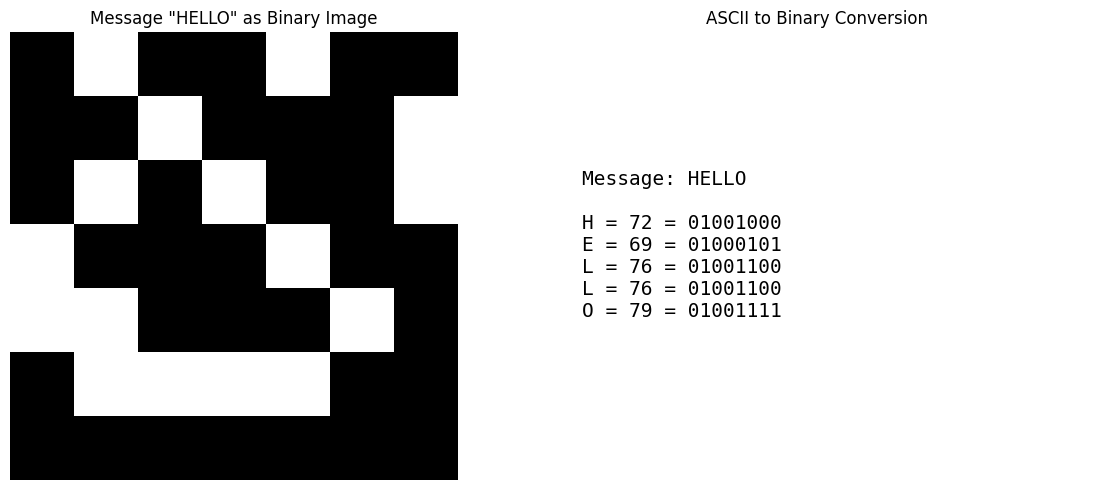

In [9]:
# Create a simple binary pattern (like a simplified QR code)
def create_binary_art(message):
    """Convert a message to binary art."""
    # Convert each character to 8-bit binary
    binary = ''.join(format(ord(c), '08b') for c in message)
    
    # Make it square-ish
    size = int(np.ceil(np.sqrt(len(binary))))
    padded = binary.ljust(size * size, '0')
    
    # Create image
    img = np.array([int(b) for b in padded]).reshape(size, size) * 255
    return img.astype(np.uint8), binary

message = "HELLO"
binary_image, binary_string = create_binary_art(message)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].imshow(binary_image, cmap='gray', interpolation='nearest')
axes[0].set_title(f'Message "{message}" as Binary Image')
axes[0].axis('off')

# Show the binary representation
axes[1].axis('off')
text = f"Message: {message}\n\n"
for i, char in enumerate(message):
    text += f"{char} = {ord(char)} = {format(ord(char), '08b')}\n"
axes[1].text(0.1, 0.5, text, fontsize=14, family='monospace', verticalalignment='center')
axes[1].set_title('ASCII to Binary Conversion')

plt.tight_layout()
plt.show()

## 8. Summary: Key Insights

What we learned in this lesson:

In [10]:
print("""
KEY INSIGHTS:
=============

1. IMAGES ARE MATRICES
   - Grayscale: 2D array (height x width)
   - Color: 3D array (height x width x 3)

2. PIXELS ARE NUMBERS
   - 8-bit: 0-255 (most common)
   - 16-bit: 0-65535 (medical imaging)

3. IMAGE PROCESSING = MATH
   - Brightness: Add a constant
   - Contrast: Multiply by a factor
   - Negative: Subtract from max value
   - Threshold: Compare with a value

4. COLOR = STACKED CHANNELS
   - RGB: Red + Green + Blue
   - Each channel is a grayscale image

5. MATRIX OPERATIONS WORK
   - Addition: Blend images
   - Multiplication: Mask effects
   - Any numpy operation!

This is the foundation of ALL image processing!
""")


KEY INSIGHTS:

1. IMAGES ARE MATRICES
   - Grayscale: 2D array (height x width)
   - Color: 3D array (height x width x 3)

2. PIXELS ARE NUMBERS
   - 8-bit: 0-255 (most common)
   - 16-bit: 0-65535 (medical imaging)

3. IMAGE PROCESSING = MATH
   - Brightness: Add a constant
   - Contrast: Multiply by a factor
   - Negative: Subtract from max value
   - Threshold: Compare with a value

4. COLOR = STACKED CHANNELS
   - RGB: Red + Green + Blue
   - Each channel is a grayscale image

5. MATRIX OPERATIONS WORK
   - Addition: Blend images
   - Multiplication: Mask effects
   - Any numpy operation!

This is the foundation of ALL image processing!

